In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset 

IRIS dataset consist of 150 Rows, 6 Columns 
- The Iris flower💐🌺 data set, also known as Fisher's Iris data set, was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.
- It is sometimes referred to as Anderson's Iris data set because Edgar Anderson collected the data to study the morphological variations among three Iris flower species.
- The data set comprises 50 samples from each of three Iris species: Iris setosa, Iris virginica, and Iris versicolor.
- Four features were measured for each sample: the length and width of the sepals and petals, all in centimeters.
- Ronald Fisher used this data set to develop a linear discriminant model for distinguishing between the three Iris species.
- Fisher's paper was published in the Annals of Eugenics and discussed the application of techniques to the field of phrenology.

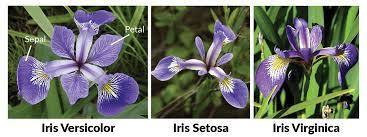

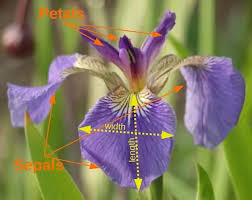

In [2]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# some info about the dataset 
# no missing data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# describe 
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# the target column
iris[["Species"]]

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [9]:
# iris Species value count 
# Equally distributed 
# ballaced lables 
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
import warnings
warnings.filterwarnings('ignore')

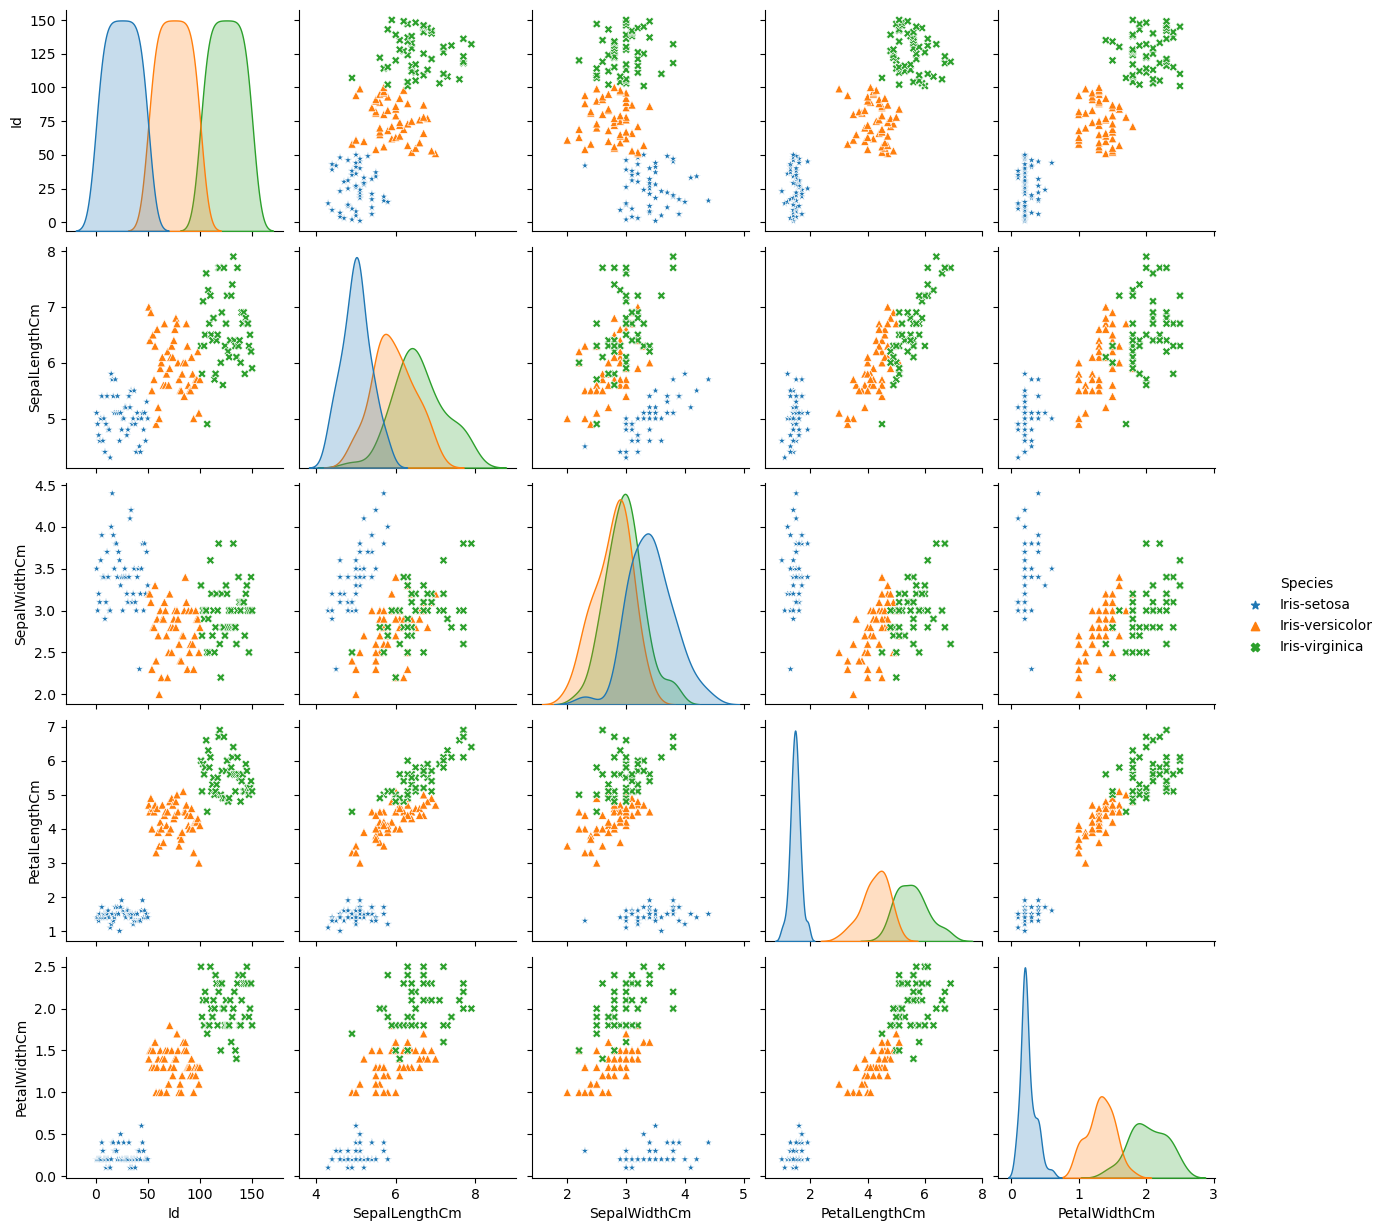

In [23]:
# pair plot
sns.pairplot(data=iris, hue="Species", markers=['*', '^', 'X']);

In [28]:
# let's encode the label column 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris["Species"] = encoder.fit_transform(iris["Species"])
iris[["Species"]]

'''
Iris-setosa        lable 0
Iris-versicolor    lable 1
Iris-virginica     lable 2
'''

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [37]:
# Scalling the data 
# First columns need to be scalled 
iris.columns
# 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Scalling the data

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in columns_to_scale:
    iris[col] = scaler.fit_transform(iris[col].to_numpy().reshape(-1,1)) 

iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,0
1,2,-1.143017,-0.124958,-1.341272,-1.312977,0
2,3,-1.385353,0.337848,-1.398138,-1.312977,0
3,4,-1.506521,0.106445,-1.284407,-1.312977,0
4,5,-1.021849,1.263460,-1.341272,-1.312977,0


In [43]:
iris['SepalLengthCm'].shape 

(150,)

In [46]:
iris['SepalLengthCm'].to_numpy().reshape(-1,1).shape

(150, 1)

In [47]:
np.array(
    [1,2,3],
).shape
# one row of 3 elements (scalers)

(3,)

In [51]:
np.array(
   [[1],[2],[3]]
).shape
# one row of 3 columns 

(3, 1)

# Splitting the data

In [69]:
# step 1 spliting the data to features and target 
# X matrix of features
# y the target column
X = iris.drop(columns=["Species", "Id"])
y = iris["Species"]


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4)

(30, 4)

(120,)

(30,)

# KNN from sklearn

In [97]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [98]:
model = KNN(n_neighbors=3)
# fitting (training)
model.fit(X_train, y_train)

# predicting 
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [112]:
pd.DataFrame({"Predictions" :y_pred,"True values": y_test})

,Predictions,True values
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# 100 % accuracy 

1.0